## MODEL naïf DE PRÉDICTION

### Le code développé tente de rassembler quelques modèles de reconnaissance des visages avec et sans masque, sans utiliser les ressources de l'apprentissage automatique ou de l'apprentissage profond.

Les valeurs associées à chaque image correspondent au coefficient de chaque méthode. étant non normalisée et l'image de base étant nulle.

In [1]:
#Bibliothèque

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import scipy as sp
from scipy import misc

In [2]:
index = {}  # Stocker le nom de l'image et les histogrammes
images = {} # Stockage de vos propres images  
    

### Cette première partie du code reconnaît les formats d'images et ne prend que les images .jpg, elle normalise également les images et permet de les adapter au GRAY (image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).

In [3]:
#Bibliothèque

import cv2
import os


input_images_path = "/home/simplon/Downloads/mask"
files_names = os.listdir(input_images_path)
print(files_names)

output_images_path = "/home/simplon/Downloads/mask1"

if not os.path.exists(output_images_path):
    os.makedirs(output_images_path)
    print("Repertoire cree: ", output_images_path)
count = 0

for file_name in files_names:
#print(file_name)
    
    '''
    if file_name.splitimport cv2 import os (".")[-1] not in ["jpeg", "png"]:
        continue
    '''
    
    
    image_path = input_images_path + "/" + file_name
#print(image_path)
    image = cv2.imread(image_path)
    
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(output_images_path + "/image" + str(count) + ".jpg", image)
    count += 1
    
    '''
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    '''  
    

['im2.jpg', 'im1.jpg', 'base.jpg']
Repertoire cree:  /home/simplon/Downloads/mask1


In [4]:
image

array([[[138, 122,  83],
        [136, 121,  86],
        [136, 122,  87],
        ...,
        [170, 160, 127],
        [168, 158, 126],
        [171, 162, 129]],

       [[139, 122,  86],
        [137, 122,  91],
        [137, 124,  92],
        ...,
        [171, 162, 133],
        [168, 161, 132],
        [168, 161, 131]],

       [[137, 122,  82],
        [136, 123,  89],
        [136, 123,  89],
        ...,
        [169, 160, 129],
        [169, 163, 131],
        [167, 161, 129]],

       ...,

       [[189, 188, 158],
        [188, 187, 156],
        [189, 186, 155],
        ...,
        [179, 184, 163],
        [171, 175, 158],
        [157, 156, 137]],

       [[186, 188, 148],
        [186, 186, 150],
        [187, 186, 155],
        ...,
        [160, 163, 146],
        [166, 171, 149],
        [164, 165, 146]],

       [[182, 183, 152],
        [184, 183, 153],
        [186, 185, 155],
        ...,
        [163, 169, 147],
        [169, 176, 157],
        [170, 173, 155]]

## J'ai réussi à le faire fonctionner (je pense)

In [5]:
# import the necessary packages

from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import cv2

index = {}
images = {}

In [6]:
dir_list = os.listdir('mask')
dir_list

['im2.jpg', 'im1.jpg', 'base.jpg']

In [7]:
# loop over the image paths
for filename in dir_list:
    # load the image, updating the images dictionary
    file_path = 'mask/' + filename
    image = cv2.imread(file_path)
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # extract a 3D RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
       [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    index[filename] = hist
   

In [8]:
images

{'im2.jpg': array([[[255, 243, 227],
         [255, 243, 227],
         [255, 244, 226],
         ...,
         [103,  99,  98],
         [ 96,  95,  93],
         [103, 102, 100]],
 
        [[255, 243, 227],
         [255, 243, 227],
         [255, 244, 226],
         ...,
         [104, 100,  97],
         [ 98,  97,  93],
         [101, 100,  96]],
 
        [[255, 245, 227],
         [255, 245, 227],
         [255, 245, 227],
         ...,
         [107, 104,  99],
         [101, 100,  95],
         [102, 101,  96]],
 
        ...,
 
        [[138, 138, 138],
         [138, 138, 138],
         [133, 133, 131],
         ...,
         [ 61,  60,  56],
         [ 55,  54,  50],
         [ 57,  56,  52]],
 
        [[132, 132, 130],
         [132, 132, 130],
         [133, 133, 131],
         ...,
         [ 93,  94,  88],
         [ 75,  76,  70],
         [ 65,  66,  60]],
 
        [[133, 133, 131],
         [129, 129, 127],
         [132, 132, 130],
         ...,
         [113, 11

In [9]:
index

{'im2.jpg': array([4.49680179e-01, 5.65907322e-02, 8.39805976e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.23772750e-05, 2.95007527e-02, 1.15070373e-01, 3.34302336e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.52796616e-03, 1.24157816e-02,
        9.37560399e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.69381325e-03,
        1.22779049e-03, 1.10301226e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.96197434e-06, 6.62496721e-04, 6.89382659e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.37876532e-06, 6.89382659e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+0

In [10]:
# METHOD #1: UTILIZING OPENCV

# initialize OpenCV methods for histogram comparison

OPENCV_METHODS = (
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Chi-Squared", cv2.HISTCMP_CHISQR),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))
# loop over the comparison methods
for (methodName, method) in OPENCV_METHODS:
#initialize the results dictionary and the sort direction
    results = {}
    reverse = False
    # if we are using the correlation or intersection
    # method, then sort the results in reverse order
    if methodName in ("Correlation", "Intersection"):
        reverse = True

In [11]:
    # loop over the index
    for (k, hist) in index.items():
        # compute the distance between the two histograms
        # using the method and update the results dictionary
        d = cv2.compareHist(index["base.jpg"], hist, method)
        results[k] = d
    # sort the results
    results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)

In [12]:
results

[(0.0, 'base.jpg'),
 (0.5069550517926616, 'im2.jpg'),
 (0.5430560719252018, 'im1.jpg')]

In [13]:
results[1][0]

0.5069550517926616

In [14]:
# show the query image
fig = plt.figure("Query")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(images["base.jpg"])
plt.axis("off")
# initialize the results figure
fig = plt.figure("Results: %s" % (methodName), figsize=(15,10))
fig.suptitle(methodName, fontsize = 20)
    # loop over the results
for (i, (v, k)) in enumerate(results):
        # show the result
        ax = fig.add_subplot(1, len(images), i + 1)
        ax.set_title("%s: %.2f" % (k, v))
        plt.imshow(images[k])
        plt.axis("off")
# show the OpenCV methods
plt.show()

## METHOD #2 (avec 3 autres méthodes)

Euclidean, Manhattan et Chebysev

Aux échecs, la distance entre les cases de l'échiquier pour les tours est mesurée en distance de Manhattan ; les rois et les reines utilisent la distance de Chebyshov, et les fous la distance de Manhattan (entre les cases de la même couleur) sur l'échiquier tourné de 45 degrés, c'est-à-dire avec leurs diagonales comme axes de coordonnées. 

Pour passer d'une case à l'autre, seuls les rois et les reines ont besoin d'autant de coups que la valeur de la distance ; les tours et les fous ont besoin d'un ou deux coups (sur un plateau vide, et en supposant que le mouvement soit possible dans le cas du fou). 



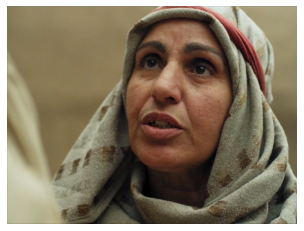

In [15]:
# METHOD #2: UTILIZING SCIPY
# initialize the scipy methods to compaute distances


   
SCIPY_METHODS = (
    ("Euclidean", dist.euclidean),
    ("Manhattan", dist.cityblock),
    ("Chebysev", dist.chebyshev))
# loop over the comparison methods
for (methodName, method) in SCIPY_METHODS:
    # initialize the dictionary dictionary
    results = {}
    # loop over the index
    for (k, hist) in index.items():
        # compute the distance between the two histograms
        # using the method and update the results dictionary
        d = method(index["base.jpg"], hist)
        results[k] = d
    # sort the results
    results = sorted([(v, k) for (k, v) in results.items()])
    # show the query image
    fig = plt.figure("Query")
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(images["base.jpg"])
    plt.axis("off")
    # initialize the results figure
    fig = plt.figure("Results: %s" % (methodName))
    fig.suptitle(methodName, fontsize = 20)
    # loop over the results
    for (i, (v, k)) in enumerate(results):
        # show the result
        ax = fig.add_subplot(1, len(images), i + 1)
        ax.set_title("%s: %.2f" % (k, v))
        plt.imshow(images[k])
        plt.axis("off")
# show the SciPy methods
plt.show()

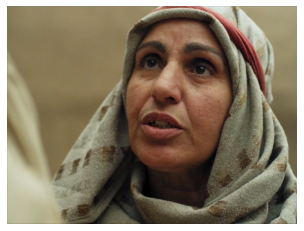

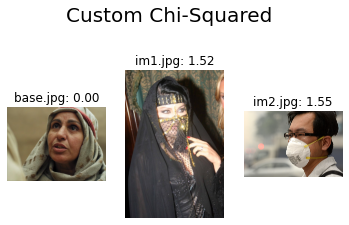

In [16]:
# METHOD #3: ROLL YOUR OWN

def chi2_distance(histA, histB, eps = 1e-10):
    # compute the chi-squared distance
    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
        for (a, b) in zip(histA, histB)])
    # return the chi-squared distance
    return d

# initialize the results dictionary
results = {}
# loop over the index
for (k, hist) in index.items():
    # compute the distance between the two histograms
    # using the custom chi-squared method, then update
    # the results dictionary
    d = chi2_distance(index["base.jpg"], hist)
    results[k] = d
# sort the results
results = sorted([(v, k) for (k, v) in results.items()])
# show the query image
fig = plt.figure("Query")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(images["base.jpg"])
plt.axis("off")
# initialize the results figure
fig = plt.figure("Results: Custom Chi-Squared")
fig.suptitle("Custom Chi-Squared", fontsize = 20)
# loop over the results
for (i, (v, k)) in enumerate(results):
    # show the result
    ax = fig.add_subplot(1, len(images), i + 1)
    ax.set_title("%s: %.2f" % (k, v))
    plt.imshow(images[k])
    plt.axis("off")
# show the custom method
plt.show()





In [17]:
results

[(0.0, 'base.jpg'),
 (1.5227280857031007, 'im1.jpg'),
 (1.550399790238407, 'im2.jpg')]